In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
possible_states = np.array([0, 1, 1, 1, 1, 0, 0, 0])

In [3]:
n = 128
l = 64

state = np.zeros((1, n))
state[0, n//2] = 1
new_state = np.zeros((1, n))

for i2 in range(l-1):

    for i in range(n):

        #po algoritmu dolocimo, v katerem stanju je dani korak v vrstici - prva vrsta
        #nam poda indeks iz arraya "possible_states," naslednja pa dodeli vrednost v
        #tem indeksu na doloceno tocko nove vrstice
        current = int(4*state[i2, (i + n - 1)%n] + 2*state[i2, i] + state[i2, (i + 1)%n])
        new_state[0, i] = possible_states[current]

    state = np.vstack((state, new_state))

In [4]:
state

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [5]:
np.savetxt('mat.dat', state, fmt='%s')

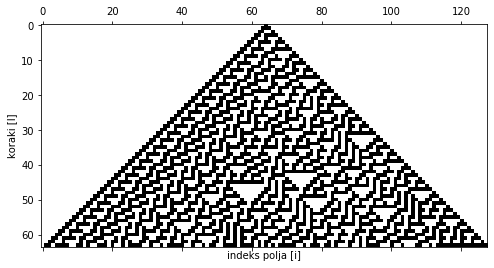

In [6]:
plt.matshow(state, cmap="Greys")
plt.xlabel("indeks polja [i]")
plt.ylabel("koraki [l]")
plt.savefig("mat.pdf", bbox_inches="tight")

In [7]:
n = 2048
l = 1024
possible_states = np.array([0, 1, 1, 1, 1, 0, 0, 0])

state = np.zeros((1, n))
state[0, n//2] = 1
new_state = np.zeros((1, n))

In [8]:
no_ones = 0
no_steps = 0
ones_arr = []
steps_arr = []

In [9]:
for i2 in range(l-1):
    
    no_steps += 1
    steps_arr.append(no_steps)
    
    no_ones = 0
        
    for i in range(n):

        current = int(4*state[i2, (i + n - 1)%n] + 2*state[i2, i] + state[i2, (i + 1)%n])
        new_state[0, i] = possible_states[current]

        #preveri, ce je nova enica v vrstici
        if possible_states[current] == 1:
            no_ones += 1
        else:
            continue

            
    ones_arr.append(no_ones)

    state = np.vstack((state, new_state))


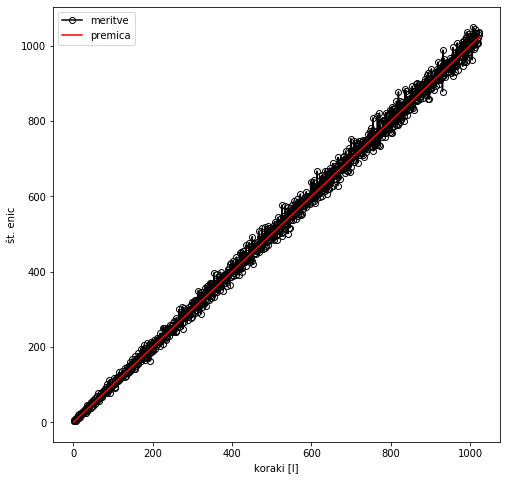

In [10]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(steps_arr, ones_arr,marker=".",ms=12,mfc="none",color="black", label='meritve')
ax.plot(steps_arr, steps_arr,marker=",",ms=12,mfc="none",color="red", label='premica')
ax.set_ylabel("št. enic")
ax.set_xlabel("koraki [l]")
ax.legend()
fig.savefig("vsota.pdf", bbox_inches="tight")

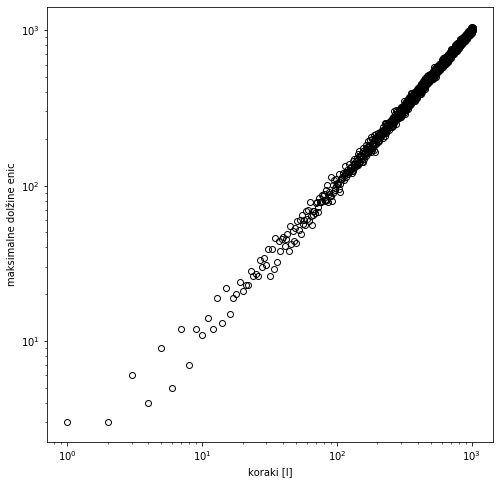

In [11]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(steps_arr, ones_arr,marker=".",ms=12,mfc="none",color="black",linestyle = 'None')
ax.set_ylabel("maksimalne dolžine enic")
ax.set_xlabel("koraki [l]")
ax.set_xscale('log')
ax.set_yscale('log')
fig.savefig("skupki.pdf", bbox_inches="tight")

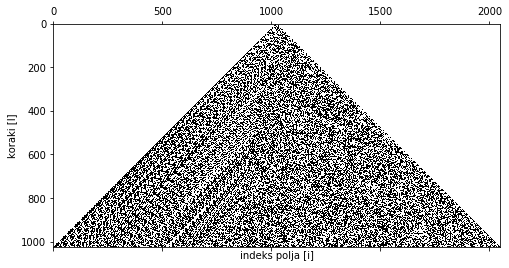

In [12]:
plt.matshow(state, cmap="Greys")
plt.xlabel("indeks polja [i]")
plt.ylabel("koraki [l]")
plt.savefig("mat2.pdf", bbox_inches="tight")